# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | ilabaya
Processing Record 3 of Set 1 | okhotsk
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | ekhabi
Processing Record 6 of Set 1 | fort saint james
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | xinzhou
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | tabou
Processing Record 12 of Set 1 | azuaga
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | kiama
Processing Record 16 of Set 1 | bratsk
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | zhigansk
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | antalaha
Processing Record 22 of Set 1 | fort-de-france
Processing Record

Processing Record 38 of Set 4 | ushtobe
Processing Record 39 of Set 4 | porosozero
Processing Record 40 of Set 4 | hermanus
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | the valley
Processing Record 44 of Set 4 | chernyshevskiy
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | imeni poliny osipenko
Processing Record 47 of Set 4 | port-gentil
Processing Record 48 of Set 4 | mnogovershinnyy
Processing Record 49 of Set 4 | aklavik
Processing Record 0 of Set 5 | palmer
Processing Record 1 of Set 5 | maniitsoq
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | balagon
Processing Record 4 of Set 5 | bubaque
Processing Record 5 of Set 5 | chom bung
City not found. Skipping...
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | nishihara
Processing Record 8 of Set 5 | floro
Processing Record 9 of Set 5 | san juan
Processing Record 10 of Set 5 | anito
Pro

Processing Record 29 of Set 8 | botwood
Processing Record 30 of Set 8 | srednekolymsk
Processing Record 31 of Set 8 | kukmor
Processing Record 32 of Set 8 | ugarcin
City not found. Skipping...
Processing Record 33 of Set 8 | merauke
Processing Record 34 of Set 8 | ararat
Processing Record 35 of Set 8 | mahanje
Processing Record 36 of Set 8 | bantry
Processing Record 37 of Set 8 | hihifo
City not found. Skipping...
Processing Record 38 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 39 of Set 8 | tuy hoa
Processing Record 40 of Set 8 | kihei
Processing Record 41 of Set 8 | barmer
Processing Record 42 of Set 8 | santa ana
Processing Record 43 of Set 8 | villa maria
Processing Record 44 of Set 8 | mergui
City not found. Skipping...
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | nabire
Processing Record 47 of Set 8 | saint-francois
Processing Record 48 of Set 8 | lowestoft
Processing Record 49 of Set 8 | touros
Processing Record 0 of Set 

Processing Record 17 of Set 12 | spirit river
Processing Record 18 of Set 12 | ruhengeri
Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | perth
Processing Record 21 of Set 12 | yar-sale
Processing Record 22 of Set 12 | namangan
Processing Record 23 of Set 12 | meyungs
City not found. Skipping...
Processing Record 24 of Set 12 | mehran
Processing Record 25 of Set 12 | alihe
Processing Record 26 of Set 12 | portland
Processing Record 27 of Set 12 | tifton
Processing Record 28 of Set 12 | vardo
Processing Record 29 of Set 12 | zaton
Processing Record 30 of Set 12 | boca do acre
Processing Record 31 of Set 12 | tombouctou
Processing Record 32 of Set 12 | fareham
Processing Record 33 of Set 12 | mareeba
Processing Record 34 of Set 12 | concepcion del uruguay
Processing Record 35 of Set 12 | krasnoselkup
Processing Record 36 of Set 12 | toamasina
Processing Record 37 of Set 12 | manzanillo
Processing Record 38 of Set 12 | bonthe
Processing Record 39 of Set 12 | c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.19,168.86,57.00,79,71,10.00,NZ,1600816324
1,ilabaya,-17.42,-70.51,62.02,49,0,0.40,PE,1600816324
2,okhotsk,59.38,143.30,50.04,79,6,4.52,RU,1600816325
3,kapaa,22.08,-159.32,86.00,62,1,12.75,US,1600816325
4,ekhabi,53.51,142.97,50.67,73,0,10.13,RU,1600816325


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

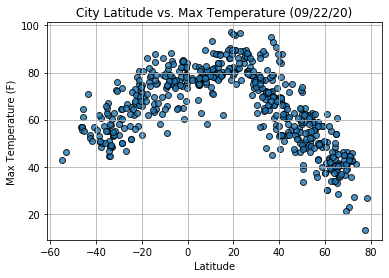

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

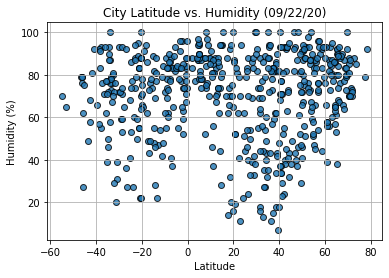

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

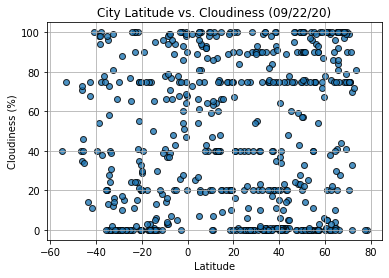

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

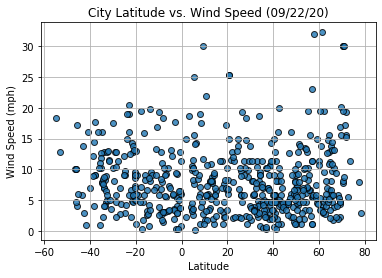

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()